# CS156 Session 4.2

## 1. Eigenfashion

Find the dataset from Image Net, as given at the bottom. They contain examples of Jerseys, Shirts, Men's clothing and Women's clothing. Decide on an interesting binary classifier to build (e.g. men's shirt vs women's shirt, or jerseys vs shirts), and choose at least 200 images suitable for building such a classifier.

Resize and crop all the images programmatically so that they all have the same dimensionality. The snippet load_images.py may be of help if you get stuck.

Now perform a PCA analysis of your dataset. How many eigenvectors should you use for a reduced representation? Give a few examples of what your original images look like under your new representation.

### Image Preprocessing

!pip install python-resize-image

In [3]:
from glob import glob
from PIL import Image
from resizeimage import resizeimage
import numpy as np

ModuleNotFoundError: No module named 'resizeimage'

In [4]:
clothing_classes = ['jerseys','shirts']

#Dictionary to store the images for the two different classes
img_data = {}

#Size to resize images to
img_size = [400,400]

#For each of the clothing classes
for clothing_class in enumerate(clothing_classes):
    
    #Create path for the image class of interest
    class_imgs = glob(f'{clothing_class[1]}/*.JPEG')
    
    #List to store the flattened images
    flattened_imgs = []
    
    #For each image path
    for path in class_imgs[:200]:
        
        #Open it as a read file in binary mode
        with open(path, 'r+b') as f:
            
            #Open it as an image
            with Image.open(f) as image:
                
                #Check if the image is too small
                if min(image.size) < min(img_size):
                    
                    #If it is, enlarge to the img_size
                    cover = image.resize(img_size)
                    
                else:
                    #Resize the image to be more manageable
                    cover = resizeimage.resize_cover(image, img_size)
                    
                # flatten the matrix to an array and append it to all flattened images
                flattened_imgs.append((np.array(cover).flatten(),clothing_class[0]))
         
    #Flatten once more
    flattened_imgs = np.asarray(flattened_imgs)
    
    #Store in dictionary
    img_data[clothing_class[1]] = {'X': np.stack(i for i in flattened_imgs[:,0]), 
                                   'Y': np.stack(i for i in flattened_imgs[:,1])}
    
    

NameError: name 'np' is not defined

In [5]:
X = np.concatenate([img_data['jerseys']['X'], img_data['shirts']['X']])
Y = np.concatenate([img_data['jerseys']['Y'], img_data['shirts']['Y']])

NameError: name 'np' is not defined

### Principal Component Analysis (PCA)

In [1]:
#Import relevant packages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
?PCA.transform

In [89]:
#Number of principal components
n_components = 20

#Run PCA
pca = PCA(n_components)
pca.fit(X)

#Reduce the dimensionality of the images using the principal components
reduced_X = pca.transform(X)

**Visualizing the changes to an original image (left) in new representation (right)**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


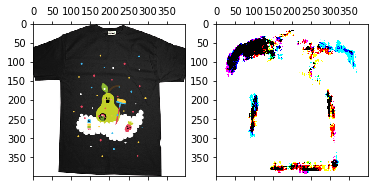

In [90]:
plt.subplot(1,2,1).matshow(X[251].reshape((400,400,3)))
plt.subplot(1,2,2).matshow(pca.inverse_transform(reduced_X[251]).reshape((400,400,3))) 
plt.show() 

**Variance explanation plot**

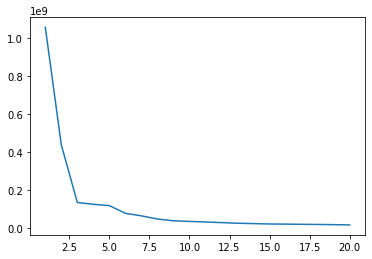

In [91]:
plt.plot(np.arange(1,21), pca.explained_variance_)
plt.show()

**Plot Principal Components**

/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


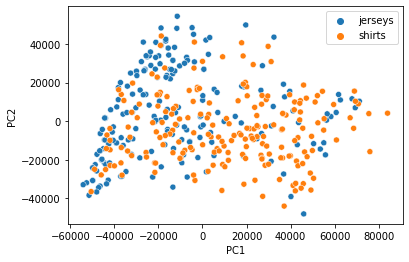

In [92]:
sns.scatterplot(reduced_X[:, 0], reduced_X[:, 1], hue=['jerseys' if p==0 else 'shirts' for p in Y])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 2. Discriminating Fashion
Using your dataset from the previous class (4.1) perform an LDA analysis of your dataset. Project the data down to a single dimension, and find the best classification accuracy that you can get on your dataset.

### a. Linear Discriminant Analysis (LDA)

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)

In [50]:
clf = LinearDiscriminantAnalysis(n_components=1)
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=1)

In [57]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred,target_names=['jerseys','shirts']))

              precision    recall  f1-score   support

     jerseys       0.78      0.74      0.76        53
      shirts       0.72      0.77      0.74        47

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



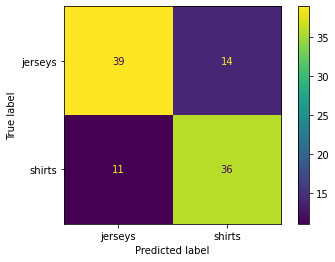

In [59]:
plot_confusion_matrix(clf, X_test, y_test,display_labels=['jerseys','shirts'])  
plt.show() 

Pretty decent results! Important to note that I changed a lot of the jersey images from the original dataset that was provided in class, instead downloading more accurate images. Hence, my results will probably greatly differ from the results that would have been obtained with the original dataset.

**Plot linear discriminant (LD1) & Principal Component (PC1)**

In [60]:
transformed_X = clf.fit_transform(X, Y)
reduced_X = PCA(1).fit_transform(X,Y)

/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/koredeakande/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


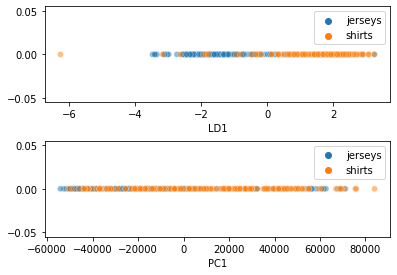

In [87]:
plt.subplot(2,1,1)
ax1 = sns.scatterplot(transformed_X[:, 0], 0, hue=['jerseys' if p==0 else 'shirts' for p in Y], alpha=0.5)
ax1.set_xlabel('LD1')

plt.subplot(2,1,2)
ax2 = sns.scatterplot(reduced_X[:, 0], 0, hue=['jerseys' if p==0 else 'shirts' for p in Y], alpha=0.5)
ax2.set_xlabel('PC1')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

### b. PCA + LDA

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [14]:
#Note steps – these will be used in the creation of a pipeline
estimators = [('reduce_dim', PCA()), ('clf', LinearDiscriminantAnalysis(n_components=1))]

#Create pipeline
pipe = Pipeline(estimators)

#Create parameter list for optimization trial
param_grid = dict(reduce_dim__n_components=[2, 5, 10])

#Run grid search to find best parameters
grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(X_train, y_train)

#Predict class using best parameters
y_gs_pred = grid_search.best_estimator_.predict(X_test)

In [17]:
print(classification_report(y_test, y_gs_pred,target_names=['jerseys','shirts']))
print(confusion_matrix(y_test, y_gs_pred))

              precision    recall  f1-score   support

     jerseys       0.79      0.78      0.79        54
      shirts       0.74      0.76      0.75        46

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100

[[42 12]
 [11 35]]


In [18]:
grid_search.best_estimator_

Pipeline(steps=[('reduce_dim', PCA(n_components=5)),
                ('clf', LinearDiscriminantAnalysis(n_components=1))])